In [2]:
import netCDF4 as nc
import xarray as xr
import os
# https://towardsdatascience.com/read-netcdf-data-with-python-901f7ff61648

In [ ]:
category = 'model driver data'
fn = 'noaagefs_meteo_driver_files/final_noaa_gefs_CONUS_2021-05-25_00_forecast_segments.nc'

#category = 'model predictions'
#fn = 'forecast_pgdl_da_outputs\PGDL-DA\\forecast[2021-04-16]_files\\f5910324-cbd3-11ec-80e4-a4bf014516d6_DA_forecast[2021-04-16]_release[0_cfs].nc'

nc_loc = os.path.join('.', 'data', category, fn) 

In [9]:
xr_ds  = xr.open_dataset(nc_loc)
xr_ds

<xarray.Dataset>
Dimensions:     (time: 10, latitude: 1, longitude: 1, seg_id_nat: 70, E: 31)
Coordinates:
  * seg_id_nat  (seg_id_nat) int32 1435 1436 1437 1438 ... 1644 1645 1649 1652
  * E           (E) int32 0 1 2 3 4 5 6 7 8 9 ... 21 22 23 24 25 26 27 28 29 30
  * latitude    (latitude) float64 42.25
  * longitude   (longitude) float64 -74.5
  * time        (time) datetime64[ns] 2021-05-25T19:30:00 ... 2021-06-03T16:3...
Data variables: (12/20)
    RH          (time, latitude, longitude, seg_id_nat, E) float32 ...
    TCDC        (time, latitude, longitude, seg_id_nat, E) float32 ...
    TMP         (time, latitude, longitude, seg_id_nat, E) float64 ...
    DLWRF       (time, latitude, longitude, seg_id_nat, E) float32 ...
    DPT         (time, latitude, longitude, seg_id_nat, E) float32 ...
    DSWRF       (time, latitude, longitude, seg_id_nat, E) float32 ...
    ...          ...
    WS          (time, latitude, longitude, seg_id_nat, E) float32 ...
    RHMAX       (time, latitude, longitude, seg_id_nat, E) float32 ...
    TMAX        (time, latitude, longitude, seg_id_nat, E) float64 ...
    RHMIN       (time, latitude, longitude, seg_id_nat, E) float32 ...
    TMIN        (time, latitude, longitude, seg_id_nat, E) float64 ...
    APCP        (time, latitude, longitude, seg_id_nat, E) float32 ...
Attributes:
    Conventions:                COARDS
    GRIB2_grid_template:        0
    NCO:                        netCDF Operators version 4.9.1 (Homepage = ht...
    issue_date_time:            2021-05-25 00
    History:                    Thu Apr 21 19:18:52 2022: ncks -A 2_units_tim...
    history_of_appended_files:  Thu Apr 21 19:18:52 2022: Appended file 2_uni...

In [10]:
var = 'time'
xr_ds[var]

<xarray.DataArray 'time' (time: 10)>
array(['2021-05-25T19:30:00.000000000', '2021-05-26T19:30:00.000000000',
       '2021-05-27T19:30:00.000000000', '2021-05-28T19:30:00.000000000',
       '2021-05-29T19:30:00.000000000', '2021-05-30T19:30:00.000000000',
       '2021-05-31T19:30:00.000000000', '2021-06-01T19:30:00.000000000',
       '2021-06-02T19:30:00.000000000', '2021-06-03T16:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-05-25T19:30:00 ... 2021-06-03T16:30:00
Attributes:
    long_name:                   verification time generated by wgrib2 functi...
    reference_time:              1621900800.0
    reference_time_type:         3
    reference_date:              2021.05.25 00:00:00 UTC
    reference_time_description:  forecasts or accumulated (including analyses...
    time_step_setting:           auto
    time_step:                   10800.0
    cell_methods:                time: mean

In [11]:
#xr_ds[var].values

In [12]:
print(xr_ds[var].min())
print(xr_ds[var].max())

<xarray.DataArray 'time' ()>
array('2021-05-25T19:30:00.000000000', dtype='datetime64[ns]')
<xarray.DataArray 'time' ()>
array('2021-06-03T16:30:00.000000000', dtype='datetime64[ns]')


In [13]:
var_plot = xr_ds[var].sel(seg_id_nat=2047)
#var_plot = xr_ds[var].isel(seg_id_nat=0)
var_plot.plot()

KeyError: "'seg_id_nat' is not a valid dimension or coordinate"

NameError: name 'longitude' is not defined

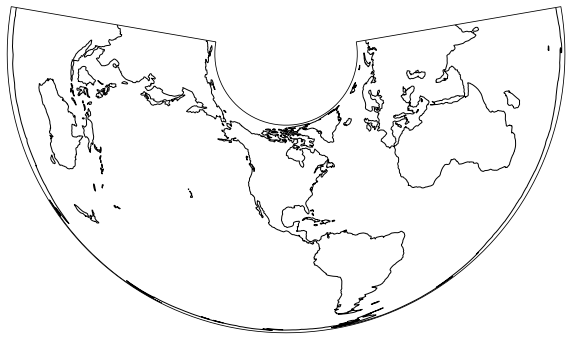

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt

# Create a spatial map of your selected location with cartopy

# Set the spatial extent to cover the CONUS (Continental United States)
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

# Create your figure and axis object
# Albers equal area is a common CRS used to make maps of the United States
f, ax = plt.subplots(figsize=(12, 6),
                     subplot_kw={'projection': ccrs.AlbersEqualArea(central_lon, central_lat)})
ax.coastlines()
# Plot the selected location
ax.plot(longitude-360, latitude, 
        '*', 
        transform=ccrs.PlateCarree(),
        color="purple", 
        markersize=10)

ax.set_extent(extent)
ax.set(title="Location of the Latitude / Longitude Being Used To to Slice Your netcdf Climate Data File")

# Adds continent boundaries to the map
ax.add_feature(cfeature.LAND, edgecolor='black')

ax.gridlines()
plt.show()

In [ ]:
ds = nc.Dataset(nc_loc)
print(ds.variables.values())

dict_values([<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: days since 1979-01-01
    long_name: time
unlimited dimensions: 
current shape = (15800,)
filling on, default _FillValue of -2147483647 used, <class 'netCDF4._netCDF4.Variable'>
int32 seg_id_nat(seg_id_nat)
    long_name: PRMS-SNTemp stream segment id national
unlimited dimensions: 
current shape = (456,)
filling on, default _FillValue of -2147483647 used, <class 'netCDF4._netCDF4.Variable'>
int32 ens(ens)
    long_name: ensemble member
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of -2147483647 used, <class 'netCDF4._netCDF4.Variable'>
float32 seg_rain(ens, seg_id_nat, time)
    units: meters
    _FillValue: 1e+32
    long_name: Area-weighted average rainfall for each segment from HRUs contributing flow to the segment
unlimited dimensions: 
current shape = (1, 456, 15800)
filling on, <class 'netCDF4._netCDF4.Variable'>
float32 seg_tave_air(ens, seg_id_nat, time)
    units: degree

dict_values([<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: days since 1979-01-01
    long_name: time
unlimited dimensions: 
current shape = (15800,)
filling on, default _FillValue of -2147483647 used, <class 'netCDF4._netCDF4.Variable'>
int32 seg_id_nat(seg_id_nat)
    long_name: PRMS-SNTemp stream segment id national
unlimited dimensions: 
current shape = (456,)
filling on, default _FillValue of -2147483647 used, <class 'netCDF4._netCDF4.Variable'>
int32 ens(ens)
    long_name: ensemble member
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of -2147483647 used, <class 'netCDF4._netCDF4.Variable'>
float32 seg_rain(ens, seg_id_nat, time)
    units: meters
    _FillValue: 1e+32
    long_name: Area-weighted average rainfall for each segment from HRUs contributing flow to the segment
unlimited dimensions: 
current shape = (1, 456, 15800)
filling on, <class 'netCDF4._netCDF4.Variable'>
float32 seg_tave_air(ens, seg_id_nat, time)
    units: degree

In [ ]:
var = ''
# https://stackoverflow.com/questions/36360469/read-nc-netcdf-files-using-python
from matplotlib import pyplot as plt # import libraries
plt.imshow(nc[var]) 
plt.show()